In [104]:
import numpy as np
import pandas as pd

In [105]:
df = pd.read_csv('adv_housing_price.csv')

In [106]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


This dataset contains 80 different features with the dependent feature 'SalePrice' to be predicted

**Statistical Analysis**

In [107]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [108]:
df.drop('Id', inplace=True, axis = 1 )

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

80 different features with many categorical features and so many missing values

In [110]:
df.drop_duplicates(inplace=True)

In [111]:
df.isnull().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

### Dropping the features with more than 50% missing values

In [112]:
threshold = 0.5
null_counts = df.isnull().sum()
columns_to_drop = null_counts[null_counts / len(df) > threshold].index

In [113]:
columns_to_drop

Index(['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [114]:
df.drop(columns=columns_to_drop, inplace=True)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

## Filling null values
Filling missing values of numerical features with the mean and of the categorical features with the mode

In [116]:
# Numerical features
numerical_cols = df.select_dtypes(include='number').columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

In [117]:
# Categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    mode_val = df[col].mode()[0]
    df[col] = df[col].fillna(mode_val)

Again checking null values

In [118]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

### Printing unique values from all categorical features
(Just to confirm encoding)

In [119]:
categorical_columns = df.select_dtypes(include=['object']).columns

In [120]:
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values for '{column}': {unique_values}")

Unique values for 'MSZoning': ['RL' 'RM' 'C (all)' 'FV' 'RH']
Unique values for 'Street': ['Pave' 'Grvl']
Unique values for 'LotShape': ['Reg' 'IR1' 'IR2' 'IR3']
Unique values for 'LandContour': ['Lvl' 'Bnk' 'Low' 'HLS']
Unique values for 'Utilities': ['AllPub' 'NoSeWa']
Unique values for 'LotConfig': ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
Unique values for 'LandSlope': ['Gtl' 'Mod' 'Sev']
Unique values for 'Neighborhood': ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Unique values for 'Condition1': ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']
Unique values for 'Condition2': ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosN' 'PosA' 'RRAn' 'RRAe']
Unique values for 'BldgType': ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' 'Twnhs']
Unique values for 'HouseStyle': ['2Story' '1Story' '1.5Fi

### Encoding categorical features

In [121]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [122]:
df.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000


In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   int64  
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   int64  
 6   LandContour    1460 non-null   int64  
 7   Utilities      1460 non-null   int64  
 8   LotConfig      1460 non-null   int64  
 9   LandSlope      1460 non-null   int64  
 10  Neighborhood   1460 non-null   int64  
 11  Condition1     1460 non-null   int64  
 12  Condition2     1460 non-null   int64  
 13  BldgType       1460 non-null   int64  
 14  HouseStyle     1460 non-null   int64  
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [124]:
# Now all the features are numerical

### Histogram

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

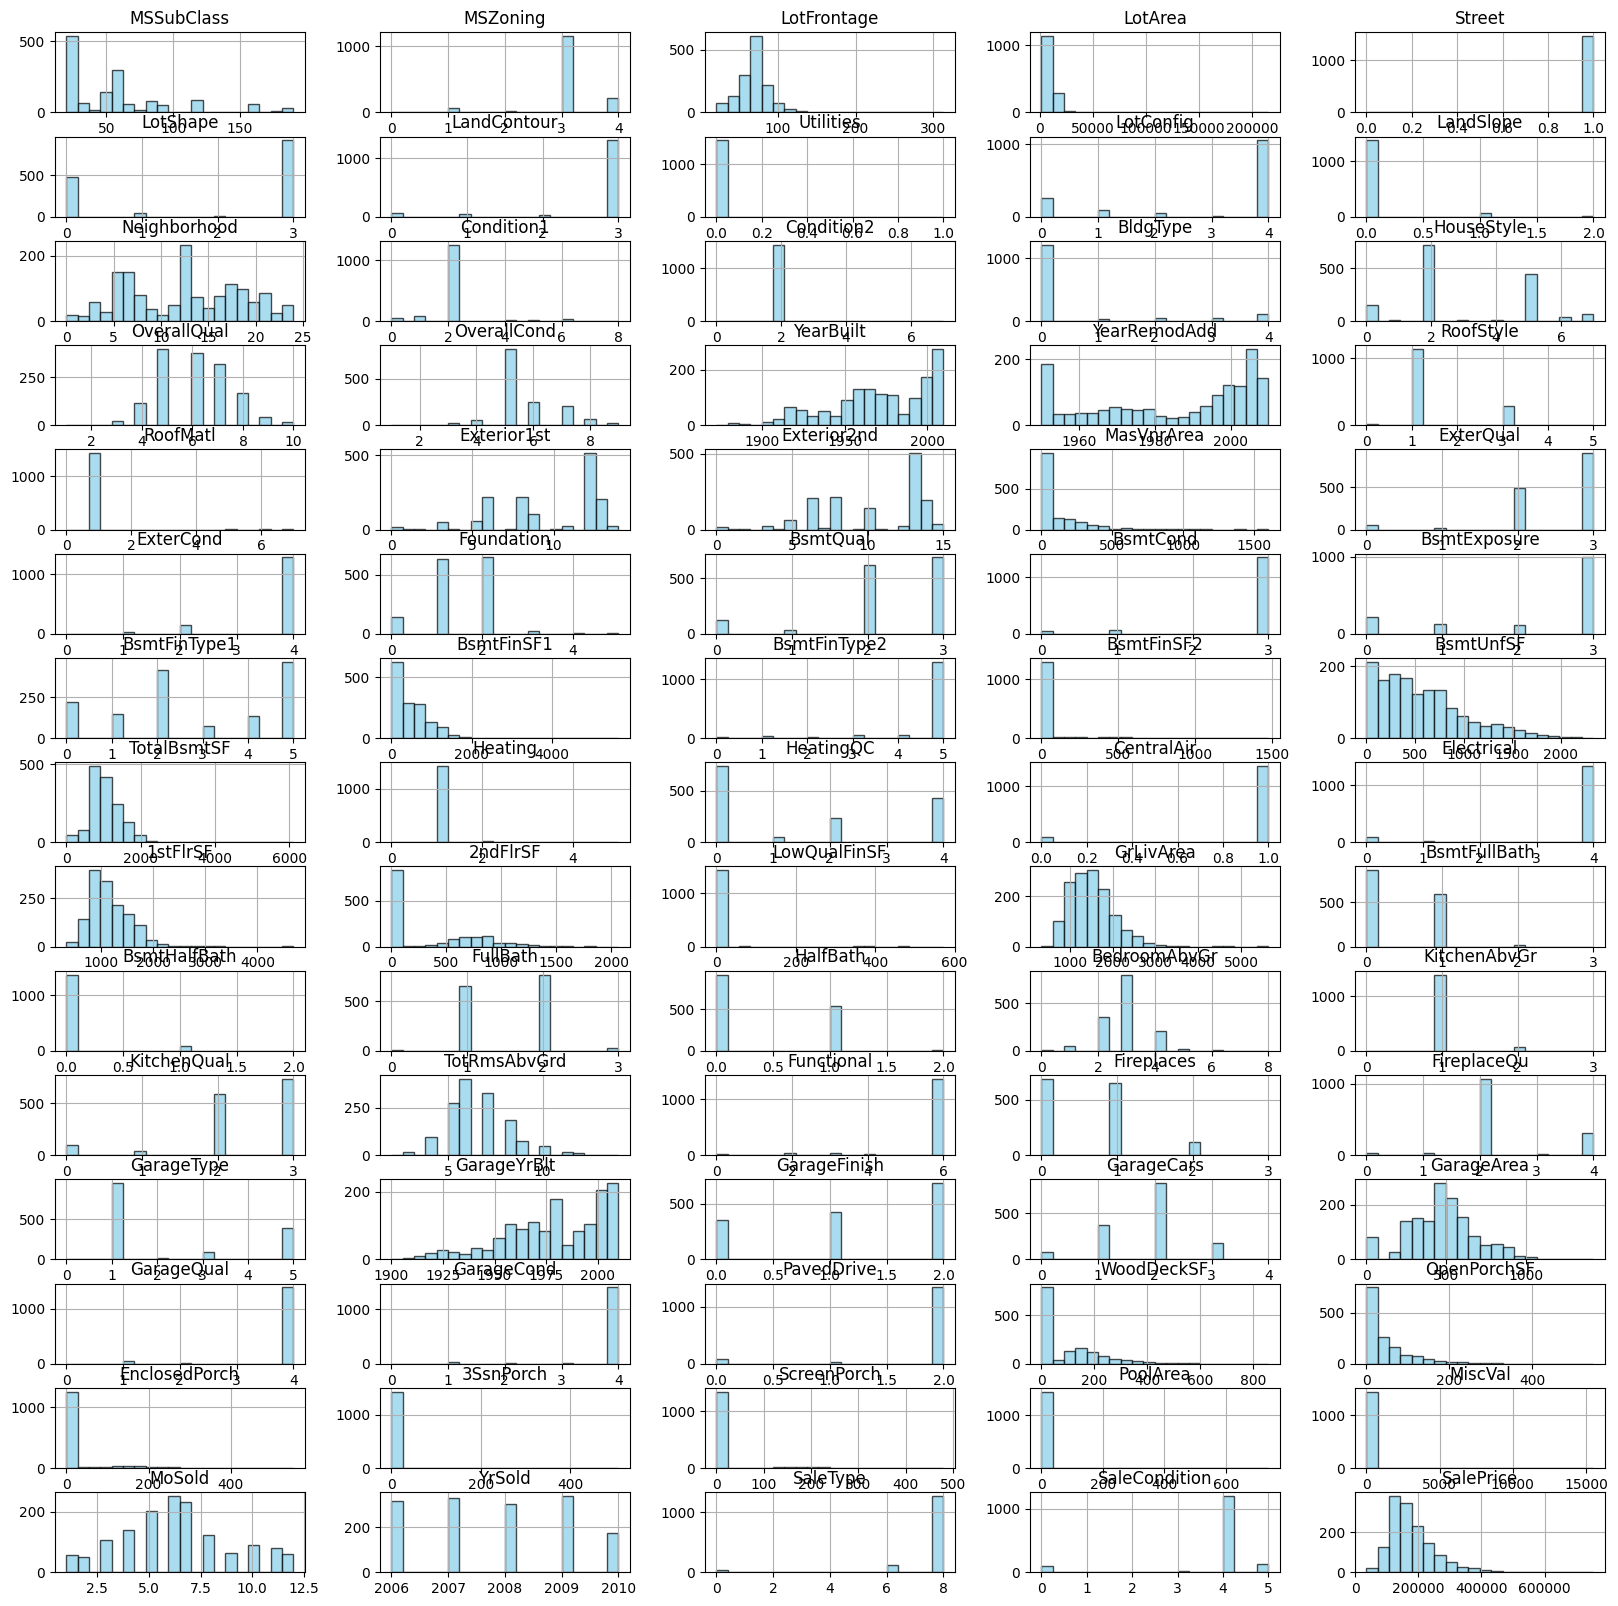

In [140]:
df.hist(bins=20, color='skyblue', edgecolor='black', figsize=(20, 20), alpha=0.7, layout=(15, 5))

plt.show()

### Checking correlation of all the features with the target feature

In [127]:
correlation_with_saleprice = df.corr()['SalePrice'].sort_values(ascending=False)
correlation_with_saleprice

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
                  ...   
HeatingQC      -0.400178
GarageFinish   -0.537242
KitchenQual    -0.589189
BsmtQual       -0.618025
ExterQual      -0.636884
Name: SalePrice, Length: 75, dtype: float64

**'OverallQual' is the highest positively correlated feature with the target feature**

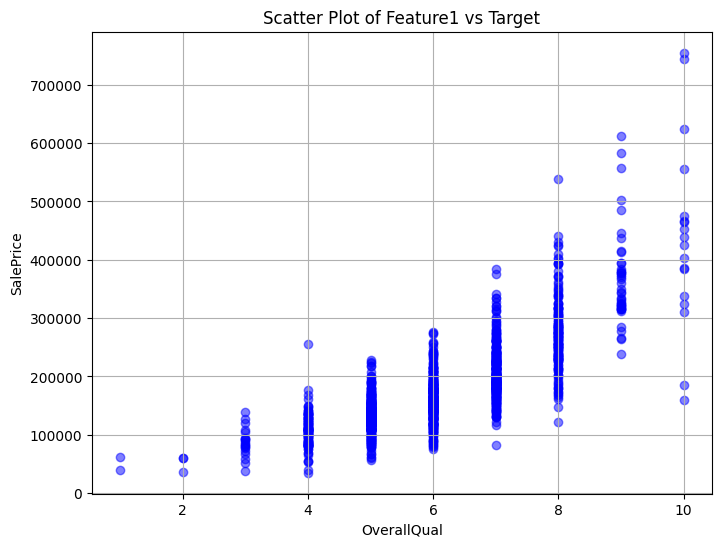

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(df['OverallQual'], df['SalePrice'], color='blue', alpha=0.5)
plt.title('Scatter Plot of Feature1 vs Target')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.grid(True)
plt.show()

Correlation Heatmap

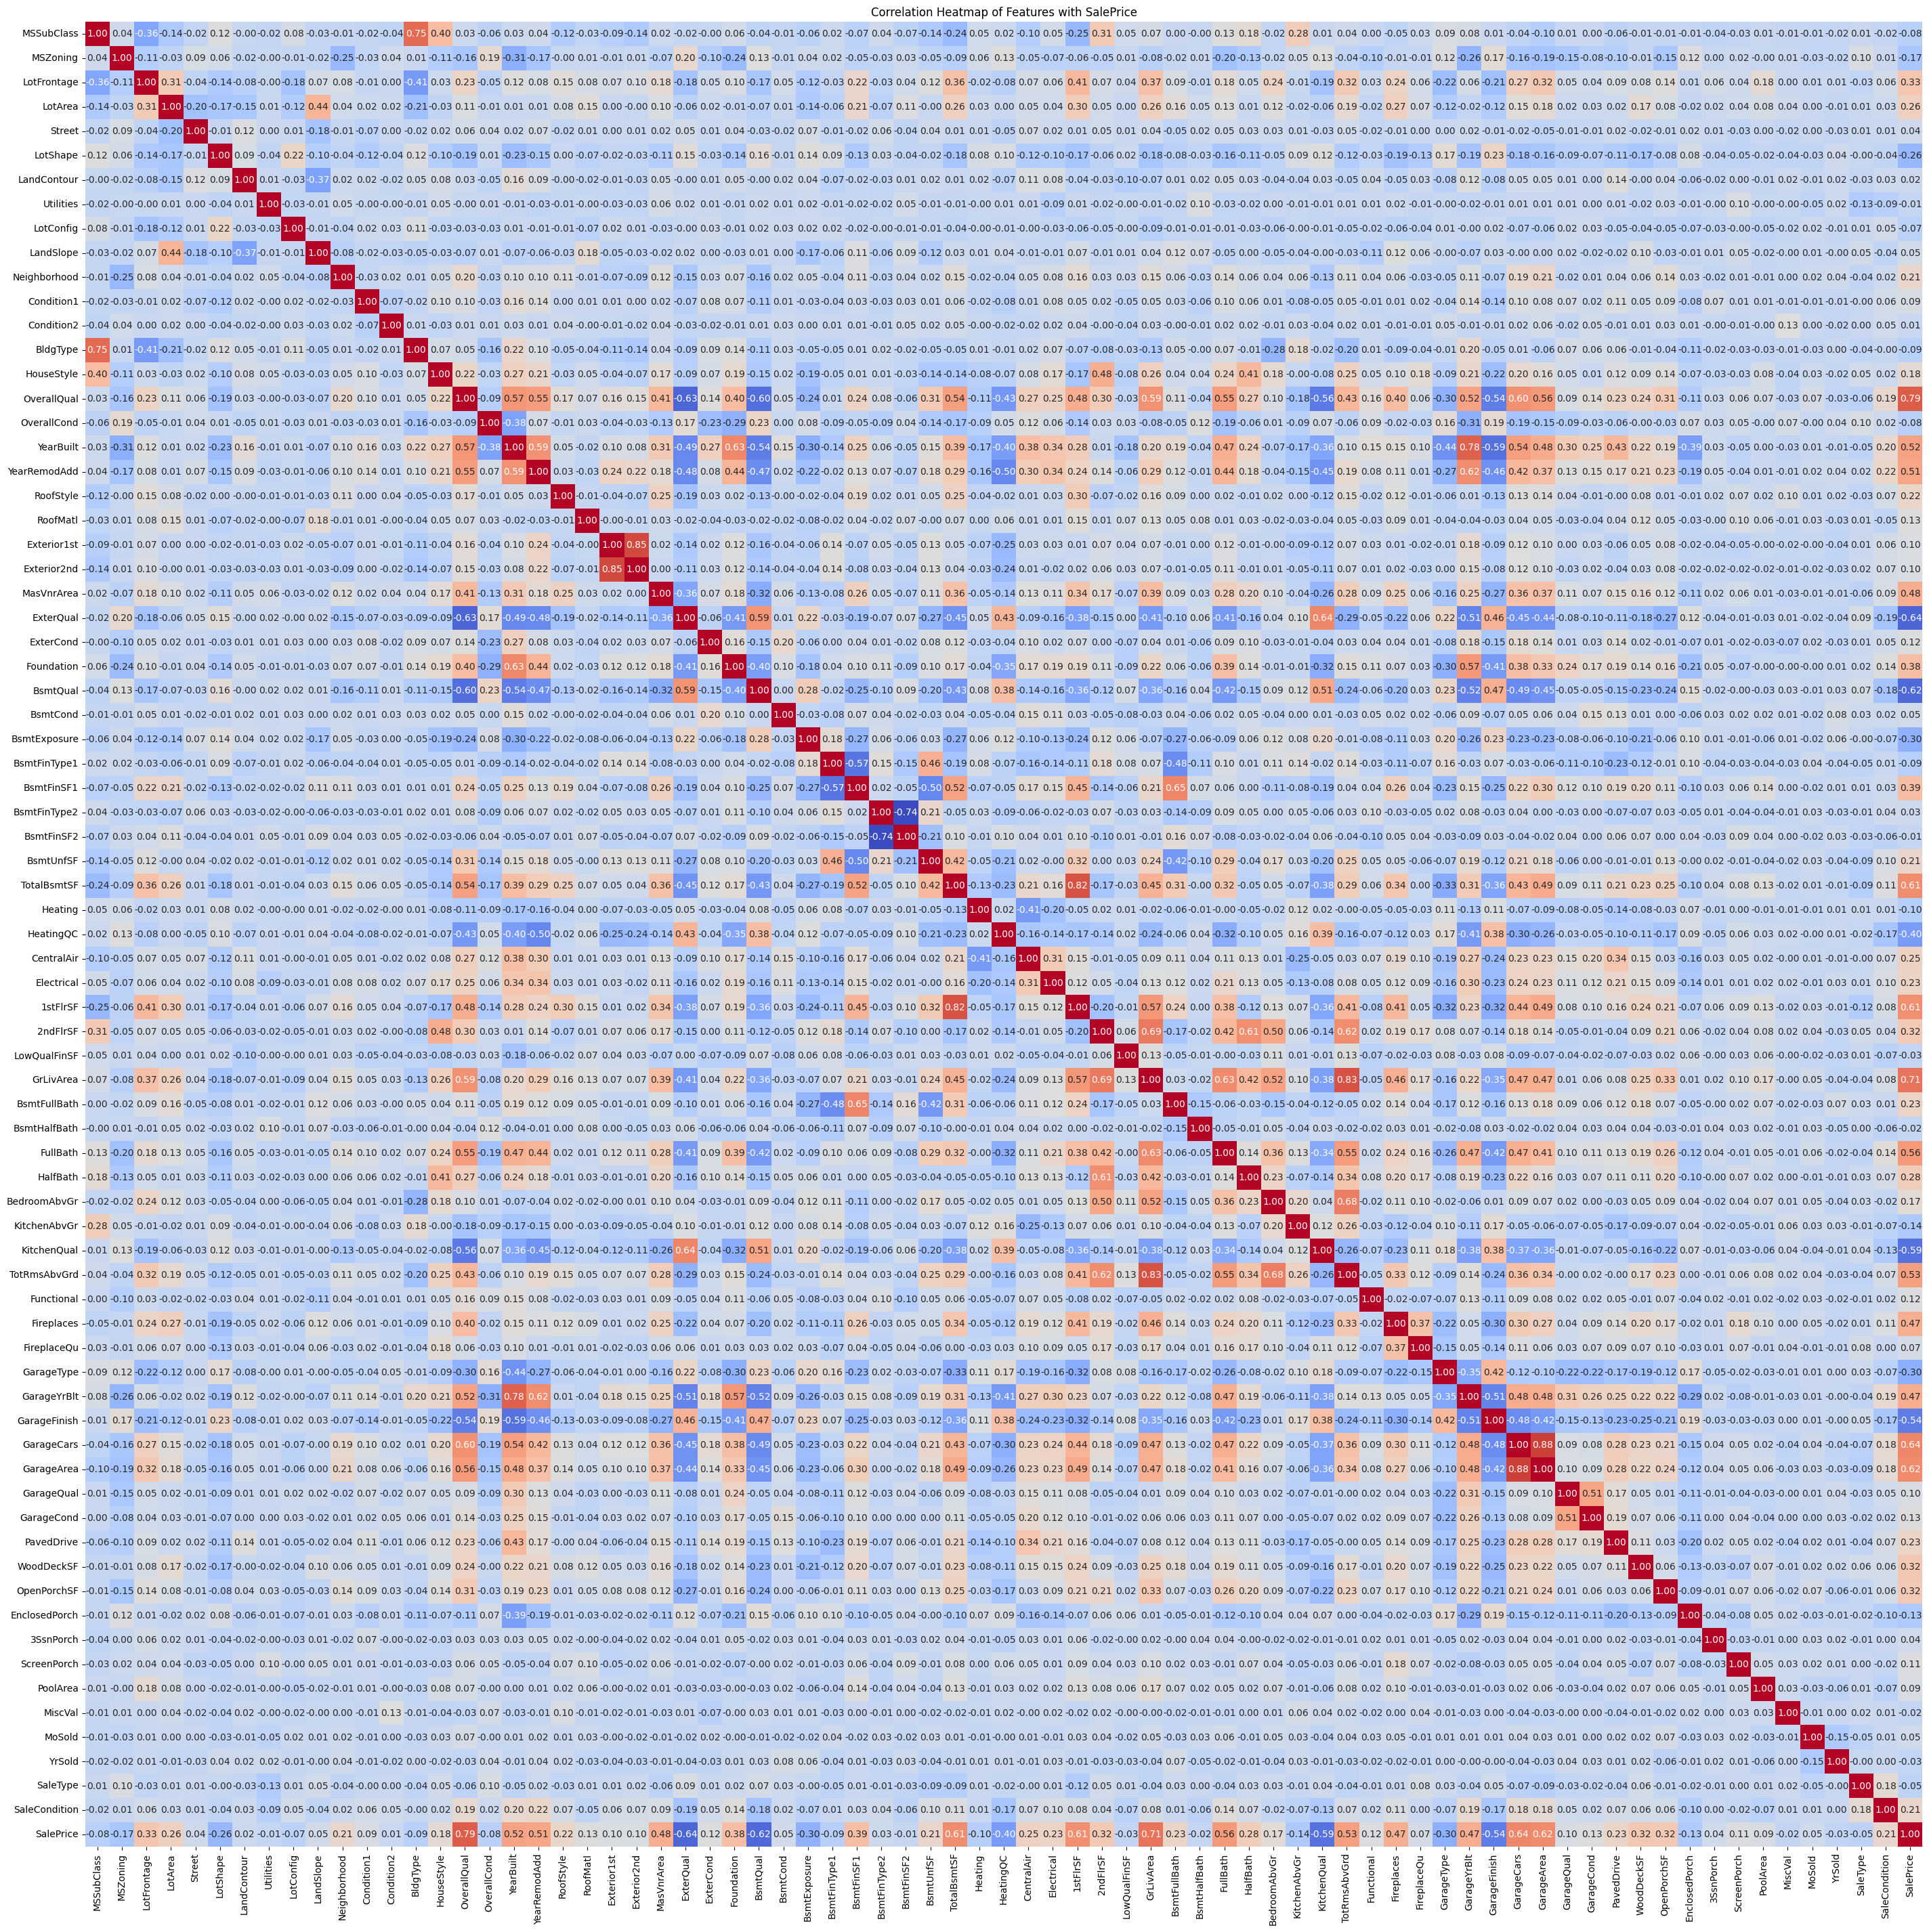

In [129]:
plt.figure(figsize=(35, 35))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Correlation Heatmap of Features with SalePrice')
plt.show()

Setting independent and dependent variables

In [130]:
X = df.drop("SalePrice", axis=1)
y = df['SalePrice']

Train test split

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling down the data

In [132]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the model

In [133]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train_scaled, y_train)

GradientBoostingRegressor(n_estimators=1000, random_state=42)

Making predictions

In [134]:
y_pred_test = gbr.predict(X_test_scaled)

Checking accuracy

In [135]:
from sklearn.metrics import mean_squared_error
test_rmse = mean_squared_error(y_test, y_pred_test, squared=False)
print(test_rmse)

28170.374348925438


/home/nrdelementary/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Training Random Forest

In [136]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [137]:
y_pred_rf = rf_reg.predict(X_test_scaled)

In [138]:
error_rf = mean_squared_error(y_pred_rf, y_test, squared=False)
print(error_rf)

29122.489230225132


/home/nrdelementary/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
